   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 19.7 MB/s eta 0:00:00


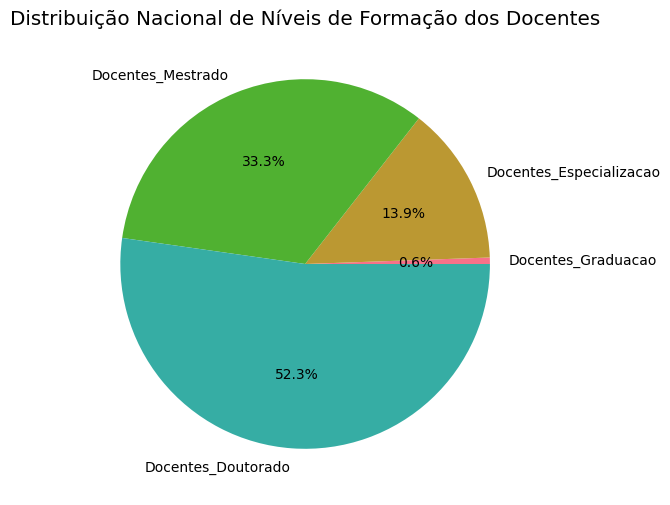

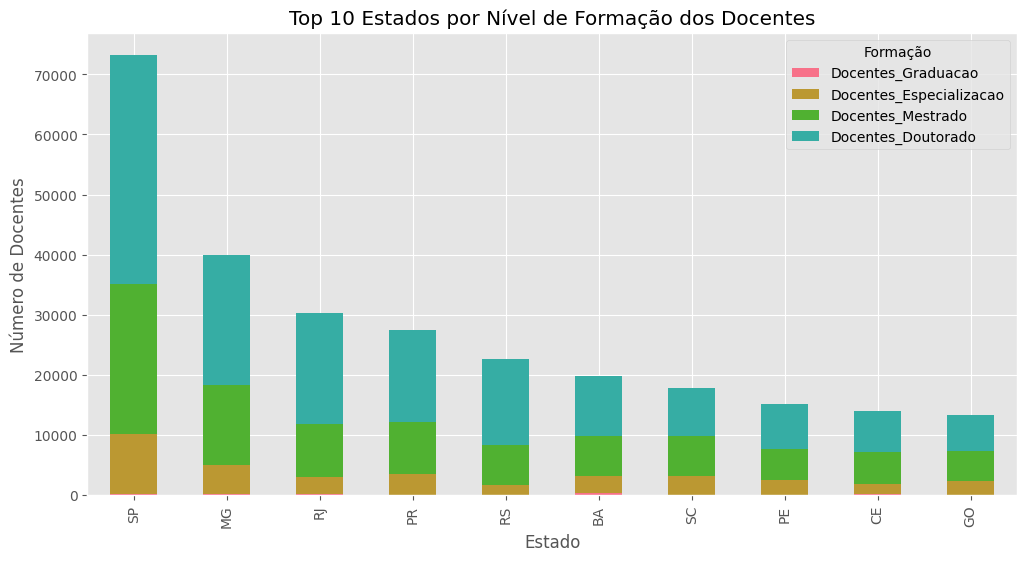

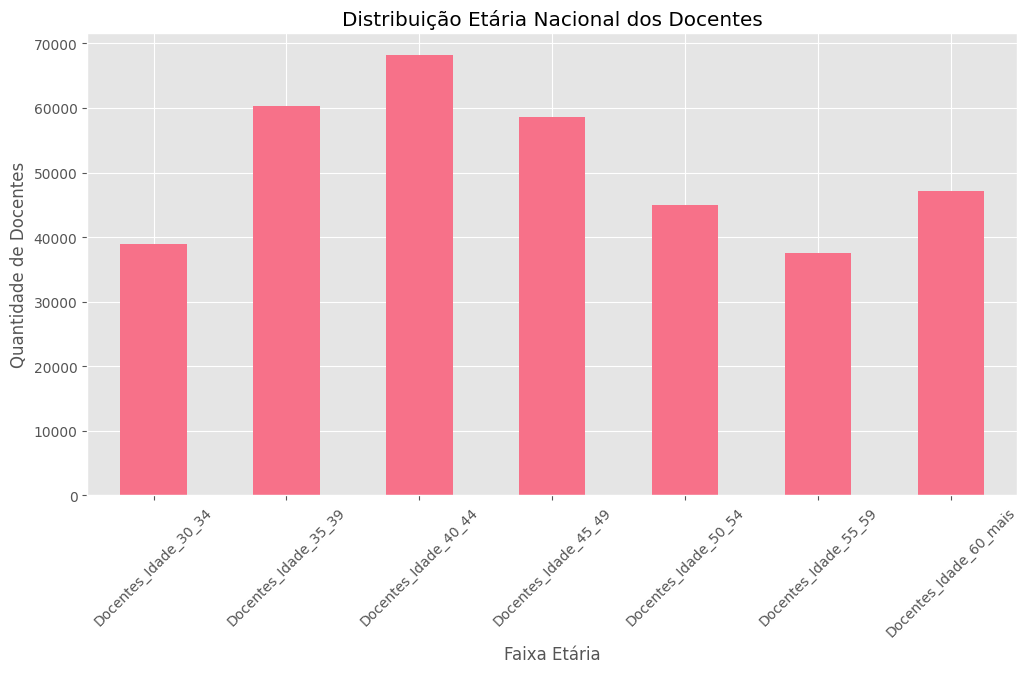

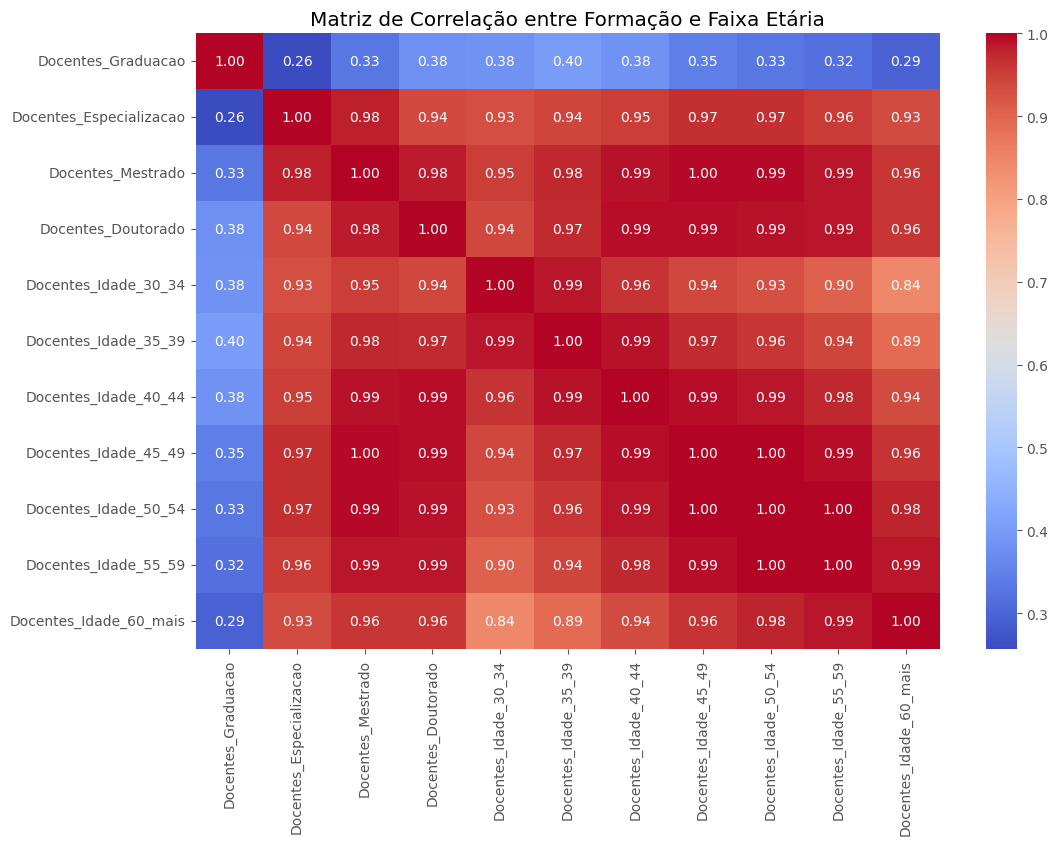

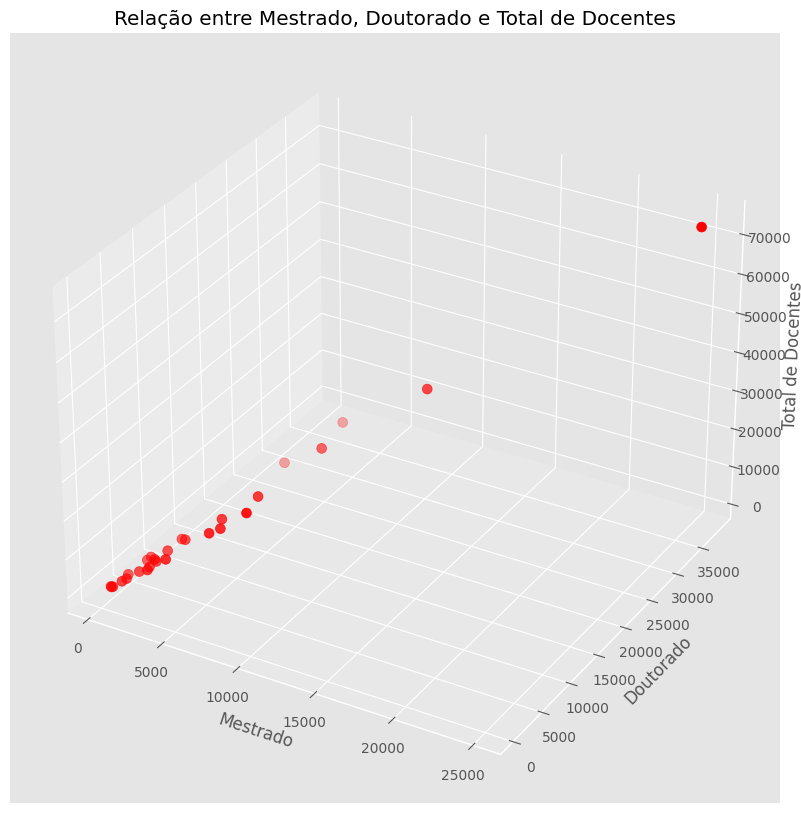

✓ Arquivo salvo: /kaggle/working/graficos/06_mapa_bolhas_interativo.png
✓ Arquivo salvo: /kaggle/working/graficos/06_mapa_bolhas_interativo.html
✓ Arquivo salvo: /kaggle/working/graficos/07_3d_interativo.png
✓ Arquivo salvo: /kaggle/working/graficos/07_3d_interativo.html

✅ Processo concluído! Gráficos disponíveis em: /kaggle/working/graficos


In [1]:
# Execute esta célula antes se necessário
!pip install -U kaleido

# Importação de bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os

# Configurar pasta para salvar gráficos
output_dir = '/kaggle/working/graficos'
os.makedirs(output_dir, exist_ok=True)

# Configuração de estilo
plt.style.use('ggplot')
sns.set_palette("husl")

# 1. Carregamento dos dados
df = pd.read_csv('/kaggle/input/dataset-microdados-agrupados-por-uf-cleaned/microdados_agrupados_por_uf.csv')

# 2. Pré-processamento
degree_cols = ['Docentes_Graduacao', 'Docentes_Especializacao', 
               'Docentes_Mestrado', 'Docentes_Doutorado']
age_cols = [col for col in df.columns if 'Idade' in col]

df['Total_Docentes'] = df[degree_cols].sum(axis=1)
df_melted = df.melt(id_vars='UF', value_vars=degree_cols, 
                    var_name='Formação', value_name='Quantidade')

# 3. Função auxiliar aprimorada para salvamento
def save_plot(fig, filename, formats=['png']):
    """Salva gráficos em múltiplos formatos"""
    for fmt in formats:
        full_path = f'{output_dir}/{filename}.{fmt}'
        
        if fmt == 'png':
            if isinstance(fig, go.Figure):
                fig.write_image(full_path, engine="kaleido")
            else:
                fig.savefig(full_path, bbox_inches='tight')
                
        elif fmt == 'html':
            if isinstance(fig, go.Figure):
                fig.write_html(full_path)
            else:
                print(f"Ignorando HTML para {filename} (suportado apenas para Plotly)")
                continue
                
        print(f'✓ Arquivo salvo: {full_path}')

# 4. Visualizações com salvamento em múltiplos formatos

# Gráfico 1: Distribuição de formação acadêmica nacional
plt.figure(figsize=(10,6))
df[degree_cols].sum().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição Nacional de Níveis de Formação dos Docentes')
plt.ylabel('')
plt.show()

# Gráfico 2: Top 10 estados por formação acadêmica (stacked bar)
top_states = df.nlargest(10, 'Total_Docentes')
top_states[degree_cols].plot(kind='bar', stacked=True, 
                            figsize=(12,6), xlabel='Estado',
                            ylabel='Número de Docentes',
                            title='Top 10 Estados por Nível de Formação dos Docentes')
plt.xticks(range(10), top_states['UF'])
plt.legend(title='Formação')
plt.show()

# Gráfico 3: Distribuição etária nacional
plt.figure(figsize=(12,6))
df[age_cols].sum().plot(kind='bar')
plt.title('Distribuição Etária Nacional dos Docentes')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Docentes')
plt.xticks(rotation=45)
plt.show()

# Gráfico 4: Heatmap de correlação
plt.figure(figsize=(12,8))
corr_matrix = df[degree_cols + age_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação entre Formação e Faixa Etária')
plt.show()

# Gráfico 5: Dispersão 3D (Matplotlib)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection='3d')
x = df['Docentes_Mestrado']
y = df['Docentes_Doutorado']
z = df['Total_Docentes']
ax.scatter(x, y, z, c='r', s=50)
ax.set_xlabel('Mestrado')
ax.set_ylabel('Doutorado')
ax.set_zlabel('Total de Docentes')
plt.title('Relação entre Mestrado, Doutorado e Total de Docentes')
plt.show()

# Gráfico 6: Mapa de bolhas interativo
fig = px.scatter(
    df, 
    x='Docentes_Mestrado', 
    y='Docentes_Doutorado',
    size='Total_Docentes', 
    color='UF',
    hover_name='UF', 
    log_x=True, 
    size_max=60,
    title='Relação entre Mestrado vs Doutorado por Estado'
)
save_plot(fig, '06_mapa_bolhas_interativo', formats=['png', 'html'])

# Gráfico 7: Gráfico 3D interativo
fig = px.scatter_3d(
    df, 
    x='Docentes_Mestrado', 
    y='Docentes_Doutorado', 
    z='Docentes_Idade_40_44',
    color='UF', 
    size='Total_Docentes',
    hover_name='UF', 
    title='Relação 3D: Mestrado, Doutorado e Idade 40-44'
)
save_plot(fig, '07_3d_interativo', formats=['png', 'html'])

print("\n✅ Processo concluído! Gráficos disponíveis em:", output_dir)